# <center><b><h1>NeuralNetwork (Second Run - Ratio 1)</h1></b></center>

In [1]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import cos, sin, atan
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix, precision_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import spearmanr, pearsonr

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## 1. Prepare the data

In [3]:
df_X_train = pd.read_csv("../../../../Data/women_menopause/starting_ratio_05/20_percent/ratio_1/X_train.csv", index_col=0)
df_X_train.shape

(1022, 14)

In [4]:
df_y_train = pd.read_csv("../../../../Data/women_menopause/starting_ratio_05/20_percent/ratio_1/y_train.csv", index_col=0)
df_y_train.shape

(1022, 1)

In [5]:
df_X_val = pd.read_csv("../../../../Data/women_menopause/X_val.csv", index_col=0)
df_X_val.shape

(10043, 14)

In [6]:
df_y_val = pd.read_csv("../../../../Data/women_menopause/y_val.csv", index_col=0)
df_y_val.shape

(10043, 1)

In [7]:
neural_network_name = 'NeuralNetwork - Women_Menopause - Second Run - 20 Percent - Ratio 1'

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [8]:
max_n_neurons = df_X_train.shape[1] * 2 + 1
max_n_randomstate = 100

In [9]:
best_score_sl = actual_score = 0.5
best_i_sl = 0
for i in range(1,max_n_neurons,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5513176282691156
I:  2 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5266899580754641
I:  3 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5242443601517269
I:  4 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.548087442603314
I:  5 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5062048313036533
I:  6 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5309323218207227
I:  7 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5462906767817928
I:  8 Best_I:  1 Best_Score:  0.5513176282691156 Actual_Score:  0.5290856458374925
I:  9 Best_I:  9 Best_Score:  0.5564723497704132 Actual_Score:  0.5564723497704132
I:  10 Best_I:  9 Best_Score:  0.5564723497704132 Actual_Score:  0.48894989019764423
I:  11 Best_I:  9 Best_Score:  0.5564723497704132 Actual_Score:  0.4824615691754841
I:  12 Best_I:  12 Best_Score:  0.5761369534837293 Actual_Score:  0.5761369534837293


In [10]:
best_score_twol = actual_score = 0.5
best_i_twol = best_j_twol = 0
for i in range(1,max_n_neurons,1):
    for j in range(1,max_n_neurons,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
Best_I:  1 Best_J:  2 Best_Score:  0.5532142144140546 Actual_Score:  0.509087642243961
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
Best_I:  2 Best_J:  15 Best_Score:  0.5793671391495309 Actual_Score:  0.5070533040527051
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I,J:  3 - 5
I,J:  3 - 6
I,J:  3 - 7
I,J:  3 - 8
I,J:  3 - 9
I,J:  

I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 18
I,J:  19 - 19
I,J:  19 - 20
I,J:  19 - 21
I,J:  19 - 22
I,J:  19 - 23
I,J:  19 - 24
I,J:  19 - 25
I,J:  19 - 26
I,J:  19 - 27
I,J:  19 - 28
Best_I:  16 Best_J:  28 Best_Score:  0.7107686164903174 Actual_Score:  0.5933639448991814
I,J:  20 - 1
I,J:  20 - 2
I,J:  20 - 3
I,J:  20 - 4
I,J:  20 - 5
I,J:  20 - 6
I,J:  20 - 7
I,J:  20 - 8
I,J:  20 - 9
I,J:  20 - 10
I,J:  20 - 11
I,J:  20 - 12
I,J:  20 - 13
I,J:  20 - 14
I,J:  20 - 15
I,J:  20 - 16
I,J:  20 - 17
I,J:  20 - 18
I,J:  20 - 19
I,J:  20 - 20
I,J:  20 - 21
I,J:  20 - 22
I,J:  20 - 23
I,J:  20 - 24
I,J:  20 - 25
I,J:  20 - 26
I,J:  20 - 27
I,J:  20 - 28
Best_I:  16 Best_J:  28 Best_Score:  0.7107686164903174 Actual_Score:  0.6656777799960072
I,J:  21 - 1
I,J:  21 - 2
I,J:  21 - 3
I,J:  21 - 4
I,

## 3 Find the best random state for both single layer and two layers

In [11]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,max_n_randomstate,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.5495348372928728 Actual_Score:  0.5495348372928728
I:  2 Best_Random_State:  1 Best_Score:  0.5495348372928728 Actual_Score:  0.5029966061090038
I:  3 Best_Random_State:  3 Best_Score:  0.5633958874026752 Actual_Score:  0.5633958874026752
I:  4 Best_Random_State:  4 Best_Score:  0.5932780994210421 Actual_Score:  0.5932780994210421
I:  5 Best_Random_State:  4 Best_Score:  0.5932780994210421 Actual_Score:  0.5646576162906768
I:  6 Best_Random_State:  4 Best_Score:  0.5932780994210421 Actual_Score:  0.5738770213615492
I:  7 Best_Random_State:  4 Best_Score:  0.5932780994210421 Actual_Score:  0.5373068476741865
I:  8 Best_Random_State:  8 Best_Score:  0.6010640846476342 Actual_Score:  0.6010640846476342
I:  9 Best_Random_State:  8 Best_Score:  0.6010640846476342 Actual_Score:  0.57986624076662
I:  10 Best_Random_State:  8 Best_Score:  0.6010640846476342 Actual_Score:  0.5803014573767219
I:  11 Best_Random_State:  8 Best_Score:  0.6010640846476342 

I:  87 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5554242363745258
I:  88 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.513328009582751
I:  89 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5929287282890796
I:  90 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5738271111998403
I:  91 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5254561788780197
I:  92 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5060051906568177
I:  93 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5653423837093232
I:  94 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5138770213615492
I:  95 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.528137352765023
I:  96 Best_Random_State:  64 Best_Score:  0.6140766620083848 Actual_Score:  0.5659912158115392
I:  97 Best_Random_State:  64 Best_Score: 

In [12]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,max_n_randomstate,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.587774006787782 Actual_Score:  0.587774006787782
I:  2 Best_Random_State:  2 Best_Score:  0.6853144340187662 Actual_Score:  0.6853144340187662
I:  3 Best_Random_State:  2 Best_Score:  0.6853144340187662 Actual_Score:  0.6328009582751047
I:  4 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.7009502894789379
I:  5 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.6216849670592934
I:  6 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.6689578758235177
I:  7 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.641621082052306
I:  8 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.6775424236374527
I:  9 Best_Random_State:  4 Best_Score:  0.7009502894789379 Actual_Score:  0.6043302056298663
I:  10 Best_Random_State:  10 Best_Score:  0.7078099421042124 Actual_Score:  0.7078099421042124
I:  11 Best_Random_State:  11 Best_Score:  0.7262128169295269

I:  87 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6172429626671991
I:  88 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6620702735076862
I:  89 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6865621880614892
I:  90 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6850289478937913
I:  91 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6352465561988421
I:  92 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6312038331004193
I:  93 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6921521261728889
I:  94 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.7183409862247954
I:  95 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6457636254741466
I:  96 Best_Random_State:  49 Best_Score:  0.7277240966260731 Actual_Score:  0.6505050908364943
I:  97 Best_Random_State:  97 Best_Score

## 4. Compute metrics on the best architecture

In [13]:
if (best_score_sl > 0.5) and (best_score_sl > best_score_twol):
    best_architecture = "One Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
elif best_score_twol > 0.5:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    print("The auc value is below the threshold of 0.5 and it means that there aren't good NN with 1 or 2 hidden layers architecture")

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the hidden layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the hidden layer  1  the best number of neurons is :  27
For the hidden layer  2  the best number of neurons is :  23


### 4.1 Confusion Matrix and Classification Report

In [14]:
conf_mat_base_folder = '../../../../Data/confusion_matrix/neural_network/women_menopause/base_ratio_05/20_percent/'

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
# Compute confusion matrix
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()

In [17]:
conf_mat_df = pd.DataFrame([list(pd.Series([tn, fp, fn, tp]))],columns=['tn', 'fp', 'fn', 'tp'])
conf_mat_df.columns.names = ['model']
conf_mat_df.rename(index={0: 'All_Patients'},inplace=True)
conf_mat_df

model,tn,fp,fn,tp
All_Patients,6749,3269,5,20


Confusion matrix
[[6749 3269]
 [   5   20]]
Normalized confusion matrix
[[0.67 0.33]
 [0.2  0.8 ]]


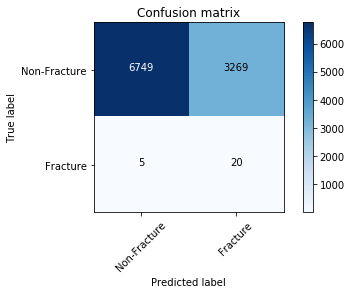

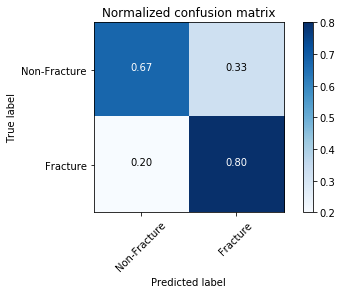

In [18]:
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"],
                      title='Confusion matrix')
plt.savefig(conf_mat_base_folder+neural_network_name+'_confusion_matrix.png', bbox_inches="tight")

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_mat, classes=['Non-Fracture', "Fracture"], normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(conf_mat_base_folder+neural_network_name+'_confusion_matrix_normalized.png', bbox_inches="tight")
plt.show()

In [19]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      0.67      0.80     10018
    Fracture       0.01      0.80      0.01        25

   micro avg       0.67      0.67      0.67     10043
   macro avg       0.50      0.74      0.41     10043
weighted avg       1.00      0.67      0.80     10043



### 4.2 Accuracy

In [20]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.6740017922931395


### 4.3 Recall (or Sensitivity)

In [21]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.8


### 4.4 Error

In [22]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.3259982077068605


### 4.5 Specificity

In [23]:
specificity = tn / (tn+fp)

print(specificity)

0.6736873627470553


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [24]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.3263126372529447
0.3263126372529447


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [25]:
precision = tp / float(tp+fp)

print(precision)

0.006080875646093037


## 5 Metrics visualization

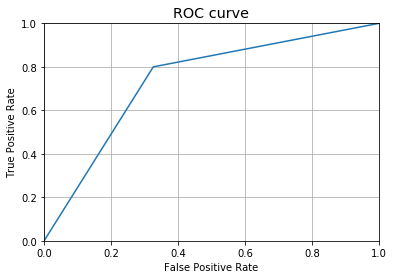

In [26]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Neural Network Visualization

In [27]:
nn_model_base_folder = '../../../../Models/Neural_Networks/women_menopause/base_ratio_05/20_percent/'

In [28]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        n_neurons = 0
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            n_neurons += 1
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType)+" - "+str(n_neurons)+" neurons", fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        plt.figure(figsize=(38,8), dpi=300)
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.savefig(nn_model_base_folder+neural_network_name+'_network.png', bbox_inches="tight")
        plt.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

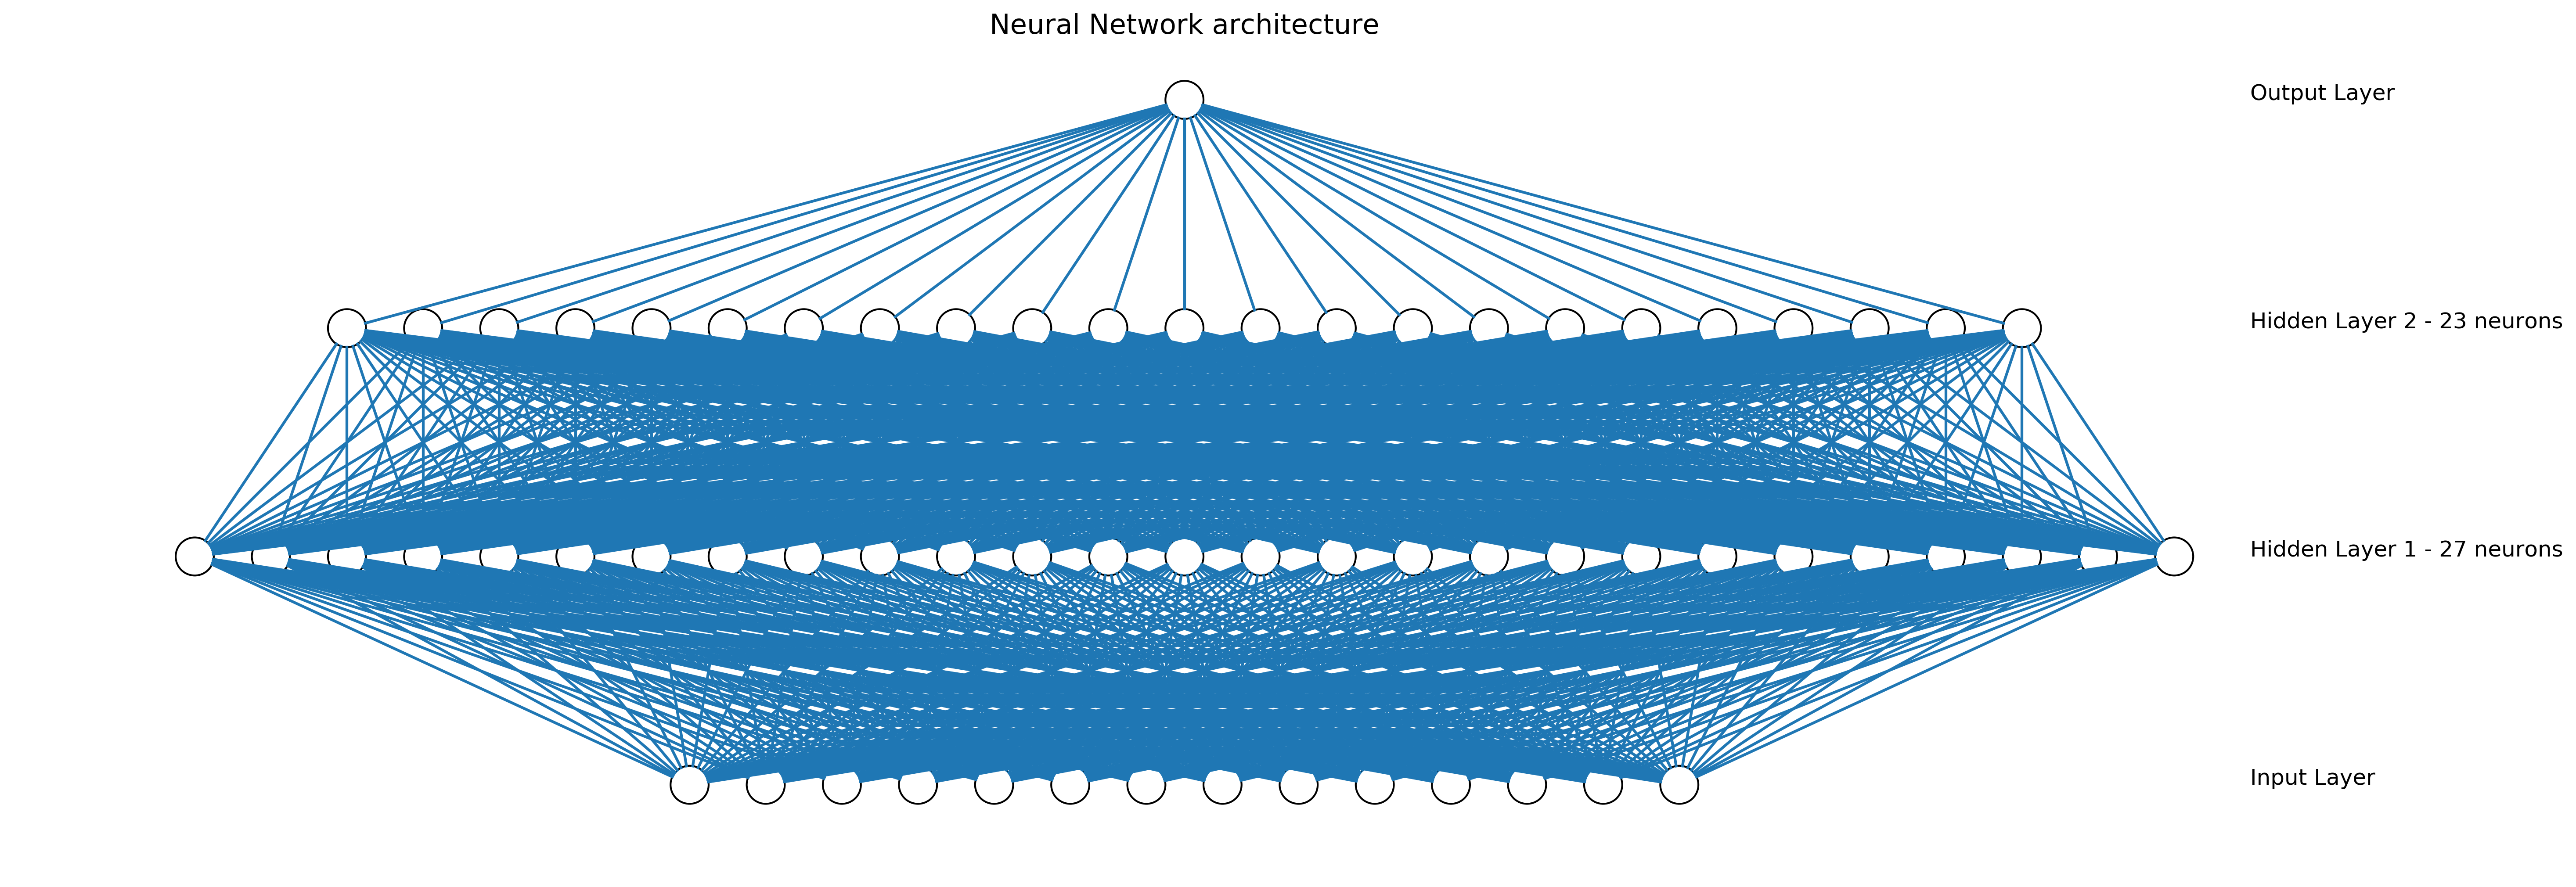

In [29]:
n_input = df_X_train.shape[1]
n_output = 1
if best_score_sl > best_score_twol:
    nn_structure = [n_input, best_i_sl, n_output]
else:
    nn_structure = [n_input, best_i_twol, best_j_twol, n_output]    
    
neural_network = DrawNN( nn_structure )
neural_network.draw()

## 7. Save the model

In [30]:
joblib.dump(mlp, nn_model_base_folder+neural_network_name+'_model.pkl')
conf_mat_df.to_csv(conf_mat_base_folder+neural_network_name+'.csv')